In [1]:
import numpy as np
import pandas as pd

In [2]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

/var/folders/86/87ct_8kx1b77cg10wy6x07k80000gn/T/ipykernel_67985/163139966.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


$2 \times x^2 - x^3 / 3$

In [3]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

In [4]:
import numpy as np

In [5]:
x = np.linspace(-2, 4, 25)

In [6]:
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [7]:
y = f(x)

In [8]:
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

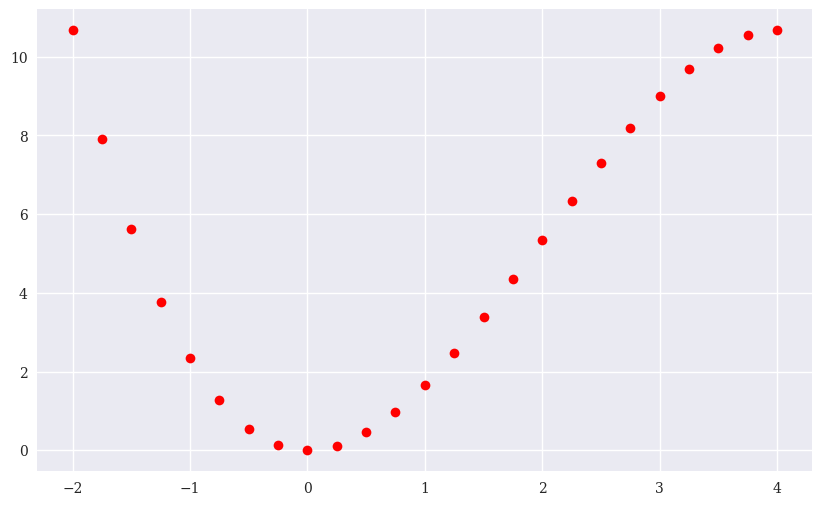

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro')

In [10]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

In [11]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [12]:
y_ = alpha + beta * x

In [13]:
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

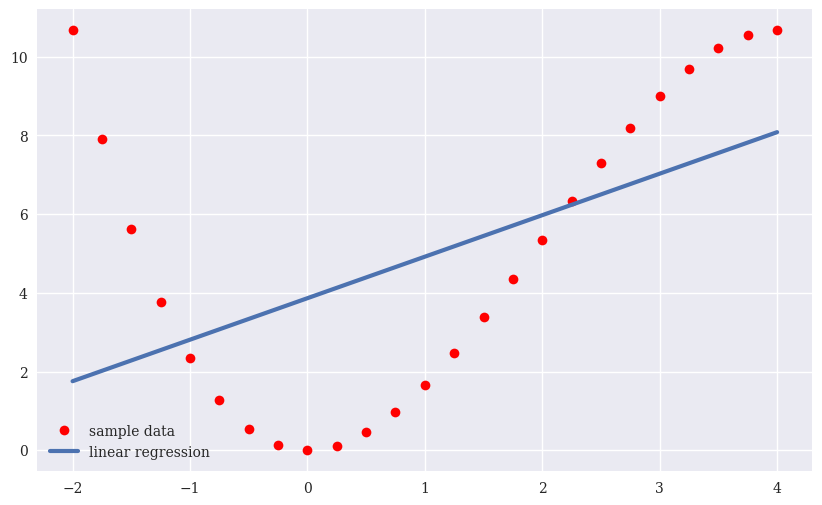

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend()

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


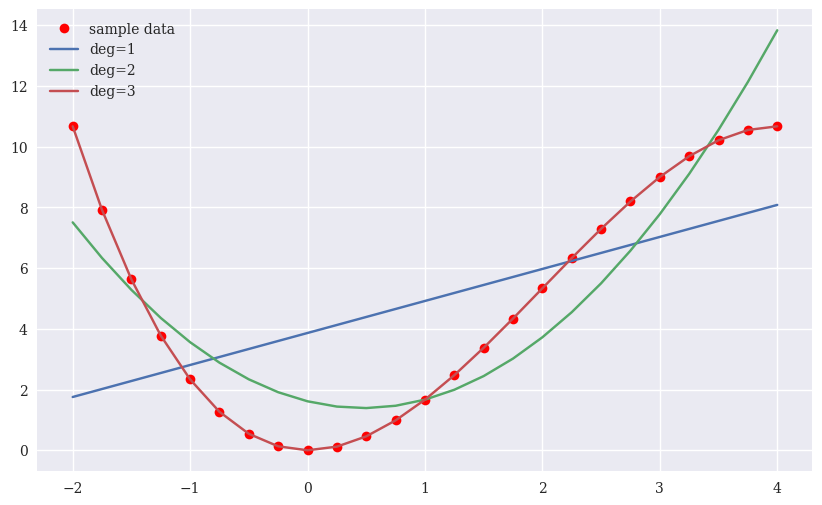

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
    plt.legend()

In [16]:
reg

array([-0.3333,  2.    ,  0.    , -0.    ])

### 1.2.2

In [17]:
from sklearn.neural_network import MLPRegressor

In [18]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)

In [19]:
model.fit(x.reshape(-1, 1),y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

In [20]:
y_ = model.predict(x.reshape(-1, 1))

In [21]:
MSE = ((y - y_) ** 2).mean()
MSE

0.009550139252727997

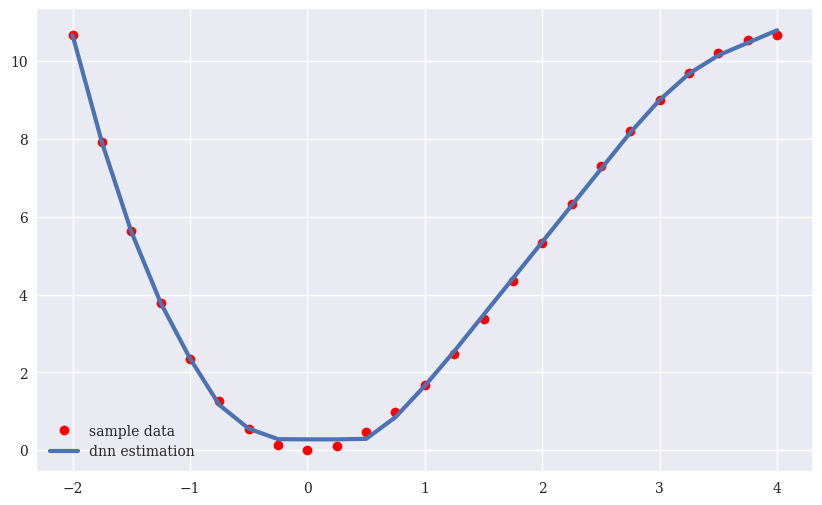

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend()

In [23]:
import tensorflow as tf
tf.random.set_seed(100)

2023-01-09 20:47:18.568952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
from keras.layers import Dense
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

2023-01-09 20:47:21.084074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
((y - y_) ** 2).mean()

0.009550139252727997

1/1 [==============================] - 0s 119ms/step
round=1 | MSE=2.719676
1/1 [==============================] - 0s 15ms/step
round=2 | MSE=0.681479
1/1 [==============================] - 0s 15ms/step
round=3 | MSE=0.210127
1/1 [==============================] - 0s 16ms/step
round=4 | MSE=0.115763
1/1 [==============================] - 0s 16ms/step
round=5 | MSE=0.090394


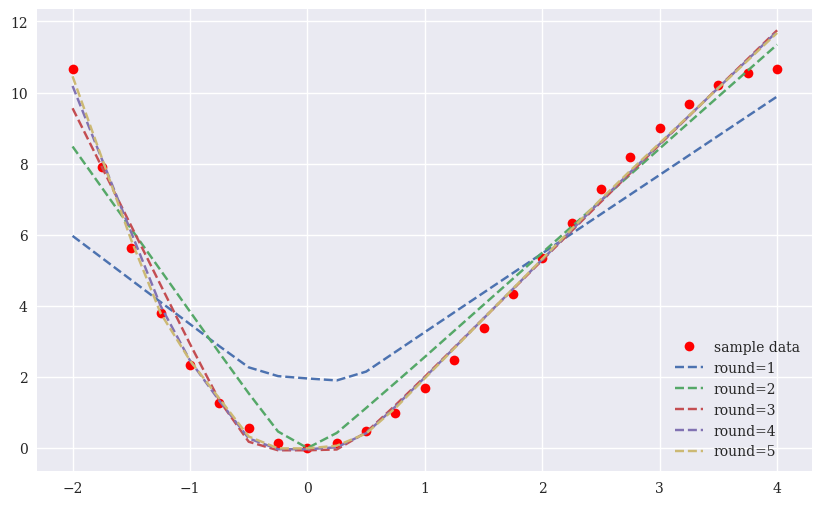

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()

In [28]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


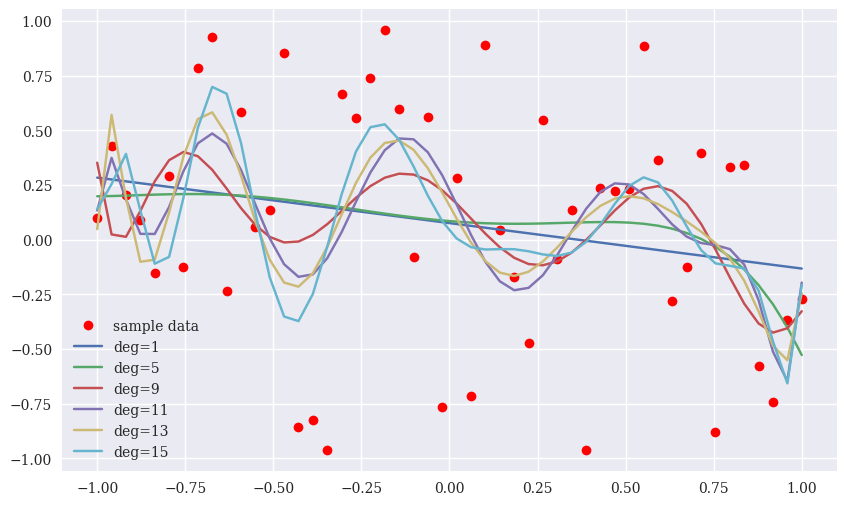

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 2ms/st

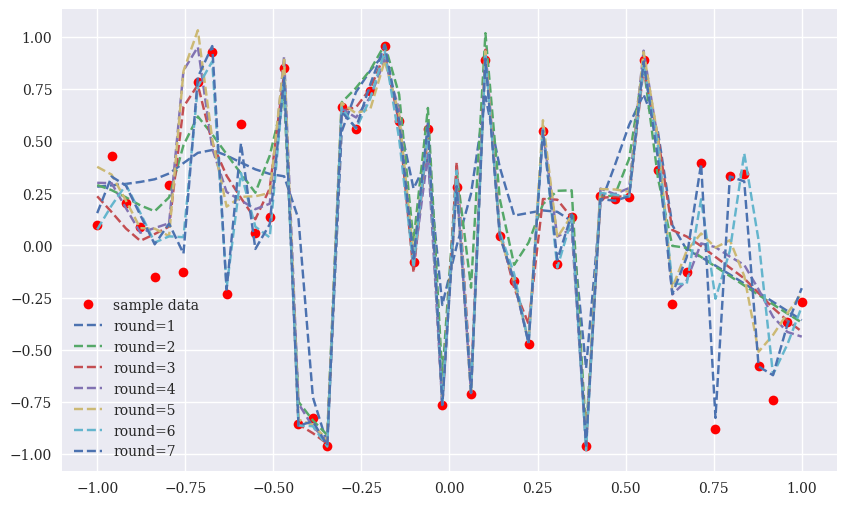

In [30]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
model.summary()
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()

### 1.2.3

In [31]:
f = 5
n = 10

In [32]:
np.random.seed(100)

In [33]:
x = np.random.randint(0, 2, (n, f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [34]:
y = np.random.randint(0, 2, n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [35]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [36]:
history = model.fit(x, y, epochs=50, verbose=False)

In [37]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)

1/1 [==============================] - 0s 36ms/step


In [38]:
y_

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [39]:
y == y_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [40]:
res = pd.DataFrame(history.history)


<AxesSubplot: >

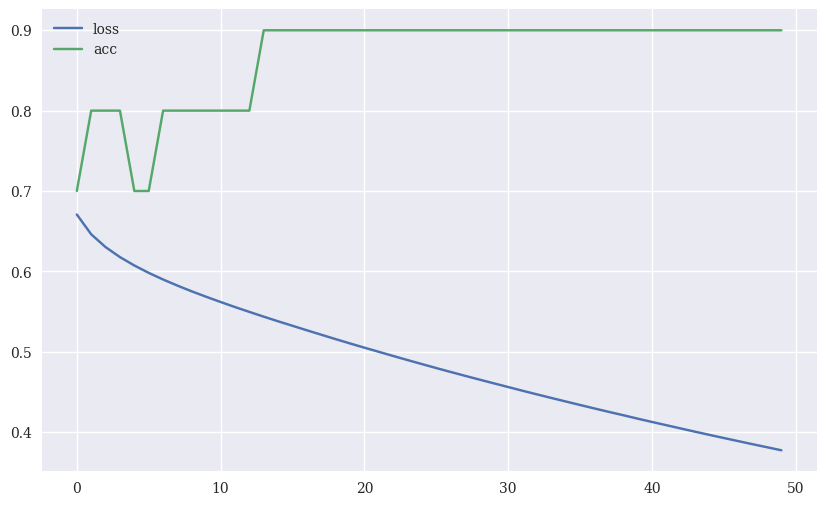

In [41]:
res.plot(figsize=(10, 6))

## 1.3

## 1.3.1

In [42]:
f = 10
n = 250

In [43]:
np.random.seed(100)

In [44]:
x = np.random.randint(0, 2, (n, f))
x[:4]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]])

In [45]:
y = np.random.randint(0, 2, n)
y[:4]

array([0, 1, 0, 0])

In [46]:
2 ** f

1024